# PS8 

## Laurence Warner

N.B. Inspiration drawn from: Beth Bailey, Shuting Chen, Alexander Tyan, Fu Zhiyu.

In [12]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid
%matplotlib inline

In [6]:
data = pd.read_csv("data/strongdrink.txt")
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### a 

In [9]:
groups = data.groupby(by = "cultivar")
groups

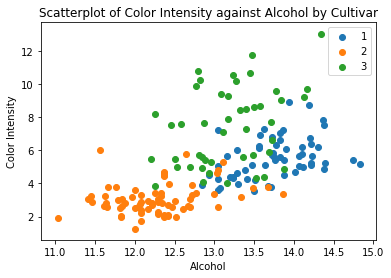

In [15]:
for name, group in groups:
    plt.scatter(group.alco, group.color_int, label = name)
plt.title("Scatterplot of Color Intensity against Alcohol by Cultivar")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
leg = plt.legend()

### b 

In [72]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=22)

In [59]:
X = data[['alco', 'malic', 'tot_phen', 'color_int']].values
y = data[['cultivar']].values
y = y.ravel()

In [45]:
kf.get_n_splits(X)

4

In [46]:
def mse_c(c): 
    mse_splits = []

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        log_reg = LogisticRegression(multi_class='multinomial', 
                                     fit_intercept=True, solver='newton-cg', C=c)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        mse = ((y_test != y_pred) ** 2).mean()

        mse_splits.append(mse)

        mse_splits

        mse = np.mean(mse_splits) 
        mse

        return mse

In [47]:
cand_c = np.arange?

In [ ]:
cand_c = np.arange

In [50]:
cand_c = np.arange(0.01, 0.99, 0.01)
cand_c

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98])

In [63]:
m = 100
for c in cand_c:
    mse = mse_c(c)
    s = "c = {}, mse = {}".format(c, mse)
    if mse < m:
        print(s)
        m = mse

c = 0.01, mse = 0.13636363636363635
c = 0.02, mse = 0.06818181818181818
c = 0.03, mse = 0.045454545454545456
c = 0.12, mse = 0.022727272727272728


Of values in my range, c = 0.12 is optimal.

In [70]:
print("lowest possible MSE is:", round(mse_c(0.12), 4))

lowest possible MSE is: 0.0227


### c 

In [91]:
def rand_forest(n_estimators, max_depth, min_samples_leaf):
    rand_forest = RandomForestClassifier(n_estimators=n_estimators,
                                        max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf,
                                        max_features='sqrt', bootstrap=True,
                                        oob_score=True, random_state=22)
    rand_forest.fit(X, y)

    oob = rand_forest.oob_score_
    return oob

In [98]:
n_est = np.arange(50, 150, 10)
depth = np.arange(2, 10)
samples = np.arange(2, 10)

In [99]:
min_mse = 100000
for n in n_est:
    for d in depth:
        for s in samples:
            mse = rand_forest(n, d, s)
            if mse < min_mse:
                min_mse = mse
                s = "n = {}, d = {}, s= {}, mse = {}".format(n, d, s, mse)
                print(s)

n = 50, d = 2, s= 2, mse = 0.9090909090909091
n = 50, d = 2, s= 7, mse = 0.9034090909090909
n = 80, d = 2, s= 8, mse = 0.8977272727272727


Minimum is bottom one listed above.

### d 

In [104]:
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(X)
MSE = np.zeros(k)
MSE_C = pd.DataFrame({"C" : np.zeros(50),
                      "G" : np.zeros(50),
                      "MSE" : np.zeros(50)})
MSE_SVM = MSE_C[:0]

for g in range(50):
    for c in range(50):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            error = y_test != y_pred
            MSE[k_ind] = error.mean()
            k_ind += 1
        MSE_C['C'][c] = c/20 + 0.05
        MSE_C['G'][c] = g/20 + 0.05
        MSE_C['MSE'][c] =  MSE.mean()
    MSE_SVM = pd.concat([MSE_SVM, MSE_C])

In [106]:
MSE_SVM.index = range(len(MSE_SVM))
MSE_SVM.sort_values(['MSE']).head(5)

,C,G,MSE
1618,0.95,1.65,0.045455
1669,1.00,1.70,0.045455
1668,0.95,1.70,0.045455
1622,1.15,1.65,0.051136
188,1.95,0.20,0.051136


Min: c = 0.95, G = 1.65. Gives an MSE of 0.04546.

### e 

In [110]:
k = 4
clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlp.get_n_splits(X)
MSE = np.zeros(k)
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])
MSE_al = pd.DataFrame({'activation' : np.zeros(10),
                       'hidden layer' : np.zeros(10),
                       'alpha' : np.zeros(10),
                       'MSE':np.zeros(10)})
MSE_mlp = MSE_al[:0]

for ac in range(4):
    for h in range(8):
        for al in range(10):
            k_ind = int(0)
            for train_index, test_index in clf_mlp.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                mlp = MLPClassifier(activation=activ[ac], solver='lbfgs',
                                    alpha=(al/20 + 0.05), 
                                    hidden_layer_sizes = ((50 * (h + 1)),))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                MSE[k_ind] = error.mean()
                k_ind += 1
            MSE_al['activation'][al] = activ[ac]
            MSE_al['hidden layer'][al] = 50 * (h + 1)
            MSE_al['alpha'][al] = al/20 + 0.05
            MSE_al['MSE'][al] =  MSE.mean()
        MSE_mlp = pd.concat([MSE_mlp, MSE_al])

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCop

In [111]:
MSE_mlp.index = range(len(MSE_mlp))
MSE_mlp.sort_values(['MSE']).head(25)

,MSE,activation,alpha,hidden layer
249,0.034091,relu,0.50,50.0
295,0.039773,relu,0.30,300.0
269,0.039773,relu,0.50,150.0
308,0.039773,relu,0.45,350.0
319,0.045455,relu,0.50,400.0
281,0.045455,relu,0.10,250.0
292,0.045455,relu,0.15,300.0
195,0.045455,tanh,0.30,200.0
298,0.045455,relu,0.45,300.0
303,0.045455,relu,0.20,350.0


Best when activation = relu, alpha = 0.5, hidden layer = 50. Gives MSE: 0.0341

### f 

There are 4, not 3 models. 
Best is: logistic regression because it has lowest MSE. I think it is because there is not a huge amount of data.

In [113]:
X.shape

(176, 4)

Only 176 observations.

Should be noted that my Random Forest MSE is 2 orders of magnitude larger: so probably not correct.